<a href="https://colab.research.google.com/github/swapnilmn/Assignment_1-CS6910/blob/master/Assignment_1_Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4 (10 Marks) Use the sweep functionality provided by wandb to find the best values for the hyperparameters listed below. Use the standard train/test split of fashion_mnist (use (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()). Keep 10% of the training data aside as validation data for this hyperparameter search. Here are some suggestions for different values to try for hyperparameters. As you can quickly see that this leads to an exponential number of combinations. You will have to think about strategies to do this hyperparameter search efficiently. Check out the options provided by wandb.sweep and write down what strategy you chose and why.

        number of epochs: 5, 10
        number of hidden layers: 3, 4, 5
        size of every hidden layer: 32, 64, 128
        weight decay (L2 regularisation): 0, 0.0005, 0.5
        learning rate: 1e-3, 1 e-4
        optimizer: sgd, momentum, nesterov, rmsprop, adam, nadam
        batch size: 16, 32, 64
        weight initialisation: random, Xavier
        activation functions: sigmoid, tanh, ReLU
wandb will automatically generate the following plots. Paste these plots below using the "Add Panel to Report" feature. Make sure you use meaningful names for each sweep (e.g. hl_3_bs_16_ac_tanh to indicate that there were 3 hidden layers, batch size was 16 and activation function was ReLU) instead of using the default names (whole-sweep, kind-sweep) given by wandb.

In [13]:
!git config --global user.email "ed22s009@smail.iitm.ac.in"
!git config --global user.name "swapnilmn"

In [1]:
!wget -O Question_3_.ipynb https://raw.githubusercontent.com/swapnilmn/Assignment_1-CS6910/master/Question_3_.ipynb?token=GHSAT0AAAAAAB7DKQRIY6WESUFM3ZD4ESYQZAH65LQ

--2023-03-08 02:50:07--  https://raw.githubusercontent.com/swapnilmn/Assignment_1-CS6910/master/Question_3_.ipynb?token=GHSAT0AAAAAAB7DKQRIY6WESUFM3ZD4ESYQZAH65LQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62675 (61K) [text/plain]
Saving to: ‘Question_3_.ipynb’

Question_3_.ipynb   100%[===================>]  61.21K  --.-KB/s    in 0.01s   

2023-03-08 02:50:08 (5.24 MB/s) - ‘Question_3_.ipynb’ saved [62675/62675]



In [2]:
!pip install import_ipynb
import import_ipynb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import Question_3_ as NN
from Question_3_  import FFNN

In [ ]:
!pip install wandb
import wandb
wandb.login()

# Train Function

  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.04396666790707658, Train Accuracy: 0.8471851851851852, Val Loss: 0.04529196324252498, Val Accuracy: 0.8413333333333334
Epoch: 10, Train Loss: 0.03438723153359152, Train Accuracy: 0.8752962962962964, Val Loss: 0.03738092948795063, Val Accuracy: 0.8666666666666667
Model trained successfully !
[[759   1   9  48   6   3 156   0  18   0]
 [  3 953   4  30   6   0   2   0   2   0]
 [ 10   2 693   8 169   0 108   0   9   1]
 [ 20   6   9 863  61   1  29   0  11   0]
 [  0   0  70  19 840   0  65   0   6   0]
 [  0   0   0   0   0 962   0  21   2  15]
 [106   1  83  32 105   0 649   0  24   0]
 [  0   0   0   0   0  45   0 936   0  19]
 [  0   0   1   5   6   6  10   5 967   0]
 [  0   0   0   0   0  24   1  49   0 926]]


accuracy,▁▄▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.8753
epoch,10
loss,0.03439
val_accuracy,0.86667
val_loss,0.03738


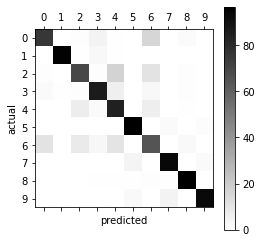

In [10]:
wandb.init(project = 'Question_4_Best_Model')

algos = ['GD','SGD', 'MiniBatch', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'Adam','Nadam']
configuration = {
    'learning_rate': 0.001,
    'epochs': 10,
    'hidden_layer_count': 3,
    'size_hidden_layers': 128,
    'optimizer': 'Adam',
    'batch_size': 128,
    'activation': 'Relu',
    'weight_initializations': 'Xavier',
    'weight_decay': 0,
    'loss_function': 'CE',
}

def train():
  
  wandb.init(project ='confusion_matrix',config=configuration, magic=True,reinit = True)
  wandb.run.name = '/batch_size/'+str(wandb.config.batch_size)+'/learning_rate/'+ str(wandb.config.learning_rate)+'/epochs/'+str(wandb.config.epochs)+ '/optimizer/'+str(wandb.config.optimizer)+ '/hidden_layer_count/'+str(wandb.config.hidden_layer_count)+'/size_hidden_layers/'+str(wandb.config.size_hidden_layers)+ '/activation/'+str(wandb.config.activation)+'/weight_decay/'+str(wandb.config.weight_decay)+'/weight_initializations/'+str(wandb.config.weight_initializations)+'/loss_function/'+str(wandb.config.loss_function)

  
  # [configuration['size_hidden_layers']] * configuration['hidden_layer_count']

  hidden_layer_count = wandb.config.hidden_layer_count 
  size_hidden_layers = wandb.config.size_hidden_layers 
  model = FFNN(NN.X_train, NN.Y_train,
                epochs = wandb.config.epochs, 
                hidden_layer_count =  wandb.config.hidden_layer_count,
                hidden_layers = [size_hidden_layers]*hidden_layer_count,
                learning_rate = wandb.config.learning_rate,
                batch_size = wandb.config.batch_size,
                activation=wandb.config.activation,
                weight_init=wandb.config.weight_initializations,
                loss = wandb.config.loss_function,
                weight_decay = wandb.config.weight_decay)

  algos = ['GD','SGD', 'MiniBatch', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'Adam','Nadam']
  ['momentum','sgd','rmsprop','nesterov','adam','nadam']
  optimizer = wandb.config.optimizer
  if optimizer == 'SGD':
    weights = model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'SGD')
  elif optimizer == 'Momentum':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'Momentum')
  elif optimizer == 'NAG':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'NAG')
  elif optimizer == 'RMSProp':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'RMSProp')
  elif optimizer == 'Adam':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo='Adam')
  elif optimizer =='nadam':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'Nadam')
  else:
    print('Invalid optimizer')



  confusion_matrix = model.confusion_matrix(NN.X_test, NN.Y_test)
  print(confusion_matrix)
  model.confusion_matrix_plot(confusion_matrix)

if __name__ == '__main__':
  train()
  wandb.finish()




# Sweeping the model

In [ ]:
try:
    import wandb
    wandb_available = True
except ImportError:
    wandb_available = False

if wandb_available:
    sweep_config = {
        'method': 'bayes',
        'name': 'Assignement1',
        'metric': {'goal': 'maximize', 'name': 'val_accuracy'},
        'parameters': {
          'epochs': {'values': [10, 15, 20]},#150
          'hidden_layer_count':{'values': [3, 4, 5]},
          'size_hidden_layers':{'values': [32,128, 256, 512]},
          'learning_rate':{'values': [0.001, 0.0001]},
          'optimizer':{'values': [ 'Momentum', 'NAG', 'RMSProp', 'Adam', 'nadam']},
          'batch_size':{'values': [32, 64, 128]},
          'activation':{'values': ['sigmoid','tanh', 'Relu']},
          'weight_initializations':{'values': ['random','Xavier']},
          'weight_decay':{'values': [0, 0.05,0.0005 ]}}
        }
     

    # Create the sweep and run the training function
    sweep_id = wandb.sweep(sweep_config, project='Question_4_Best_Model')
    wandb.agent(sweep_id, function=train)
else:
    print('wandb library not available')


Create sweep with ID: emr7bef8
Sweep URL: https://wandb.ai/ed22s009/Question_4_Best_Model/sweeps/emr7bef8


wandb: Agent Starting Run: n4epnjbr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layer_count: 4
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adam
wandb: 	size_hidden_layers: 32
wandb: 	weight_decay: 0
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.23025156715106293, Train Accuracy: 0.10005555555555555, Val Loss: 0.2302566759350598, Val Accuracy: 0.0995
Epoch: 10, Train Loss: 0.22692605570940744, Train Accuracy: 0.1945925925925926, Val Loss: 0.22692569343192767, Val Accuracy: 0.19316666666666665
Model trained successfully !
[[   0  984    0    0    0    0    0    0   16    0]
 [   0  999    0    0    0    0    0    0    1    0]
 [   0  988    0    0    0    0    0    0   12    0]
 [   0  996    0    0    0    0    0    0    4    0]
 [   0  993    0    0    0    0    0    0    7    0]
 [   0    1    0    0    0    0    0    0  999    0]
 [   0  972    0    0    0    0    0    0   28    0]
 [   0    0    0    0    0    0    0    0 1000    0]
 [   0   63    0    0    0    0    0    0  937    0]
 [   0    1    0    0    0    0    0    0  999    0]]


accuracy,▁▁▁▁▁▁▁███
epoch,▁▂▃▃▄▅▆▆▇█
loss,██████▇▃▁▁
val_accuracy,▁▁▁▁▁▁▁███
val_loss,██████▇▃▁▁
accuracy,0.19459
epoch,10
loss,0.22693
val_accuracy,0.19317
val_loss,0.22693


wandb: Agent Starting Run: npzoa0sl with config:
wandb: 	activation: Relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layer_count: 4
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Momentum
wandb: 	size_hidden_layers: 256
wandb: 	weight_decay: 0.0005
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.2302564920813483, Train Accuracy: 0.30814814814814817, Val Loss: 0.23025653868388074, Val Accuracy: 0.30216666666666664
Epoch: 10, Train Loss: 0.23025604266287164, Train Accuracy: 0.3358703703703704, Val Loss: 0.23025613106985598, Val Accuracy: 0.32766666666666666
Model trained successfully !
[[  0 255 326   0   0   0   0  86   0 333]
 [  0 930  20   0   0   0   0  19   0  31]
 [  0  82 575   0   0   0   0  77   1 265]
 [  0 603 172   0   0   0   0  76   0 149]
 [  0  82 647   0   0   0   0  42   0 229]
 [  0   2   2   0   0   0   0 739   0 257]
 [  0 157 348   0   0   0   0 143   0 352]
 [  0   0   0   0   0   0   0 856   0 144]
 [  0  31  50   0   0   0   0 103   0 816]
 [  0   1   6   0   0   0   0  51   0 942]]


accuracy,▁▁▂▄▆▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▁▂▄▆▇████
val_loss,█▇▆▅▄▃▃▂▂▁
accuracy,0.33587
epoch,10
loss,0.23026
val_accuracy,0.32767
val_loss,0.23026


wandb: Agent Starting Run: k8apqbrj with config:
wandb: 	activation: Relu
wandb: 	batch_size: 128
wandb: 	epochs: 15
wandb: 	hidden_layer_count: 4
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Adam
wandb: 	size_hidden_layers: 256
wandb: 	weight_decay: 0
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/15 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.08522990860617871, Train Accuracy: 0.6762777777777778, Val Loss: 0.08695941468346309, Val Accuracy: 0.6701666666666667
Epoch: 10, Train Loss: 0.06770542964698827, Train Accuracy: 0.7495555555555555, Val Loss: 0.06948928959205239, Val Accuracy: 0.7393333333333333
Epoch: 15, Train Loss: 0.05433837311247157, Train Accuracy: 0.8099814814814815, Val Loss: 0.05639534375412965, Val Accuracy: 0.8008333333333333
Model trained successfully !
[[775   3  61  86  14   0  46   0  15   0]
 [  9 921  10  49   5   0   5   0   1   0]
 [ 17   0 737  10 123   0 106   0   7   0]
 [ 46  16  23 808  65   0  32   0  10   0]
 [  1   0 150  36 548   0 252   0  13   0]
 [  0   0   0   0   0 912   0  55   2  31]
 [159   0 155  61 118   0 482   0  25   0]
 [  0   0   0   0   0  47   0 918   1  34]
 [  0   0   7   3  11   2  30   3 925  19]
 [  0   0   0   0   0  15   0  50   2 933]]


accuracy,▁▅▆▆▆▇▇▇▇▇▇████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▃▃▃▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▆▆▇▇▇▇▇▇████
val_loss,█▃▃▃▂▂▂▂▂▂▁▁▁▁▁
accuracy,0.80998
epoch,15
loss,0.05434
val_accuracy,0.80083
val_loss,0.0564


wandb: Agent Starting Run: 3icw1ewa with config:
wandb: 	activation: Relu
wandb: 	batch_size: 128
wandb: 	epochs: 20
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 256
wandb: 	weight_decay: 0.0005
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/20 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.22367507936929337, Train Accuracy: 0.2144074074074074, Val Loss: 0.22366750111090639, Val Accuracy: 0.21116666666666667
Epoch: 10, Train Loss: 0.06823666171628433, Train Accuracy: 0.7404814814814815, Val Loss: 0.0689621119344056, Val Accuracy: 0.74
Epoch: 15, Train Loss: 0.04991276993349526, Train Accuracy: 0.8260185185185185, Val Loss: 0.05210504853807414, Val Accuracy: 0.8243333333333334
Epoch: 20, Train Loss: 0.04189112065090449, Train Accuracy: 0.8563148148148149, Val Loss: 0.04523138026728211, Val Accuracy: 0.8435
Model trained successfully !
[[781   1  10  50  10   0 134   0  14   0]
 [  4 927   2  52  11   0   4   0   0   0]
 [  7   0 754  13  92   0 125   0   9   0]
 [ 33  16  13 843  55   0  26   0  14   0]
 [  1   0 128  48 712   0  99   0  12   0]
 [  1   0   0   0   0 918   0  37   3  41]
 [151   0 116  35  77   0 606   0  15   0]
 [  0   0   0   0   0  32   0 932   0  36]
 [  0   1   1  10  20   3  15   3 936  11]
 [  0   0   0   0   0   8   0  33  

accuracy,▁▁▁▂▂▅▆▆▇▇▇▇████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█████▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▂▂▅▆▆▇▇▇▇████████
val_loss,█████▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁
accuracy,0.85631
epoch,20
loss,0.04189
val_accuracy,0.8435
val_loss,0.04523


wandb: Agent Starting Run: ootvakgt with config:
wandb: 	activation: Relu
wandb: 	batch_size: 128
wandb: 	epochs: 20
wandb: 	hidden_layer_count: 4
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 512
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/20 [00:00<?, ?epoch/s]